In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.ticker import MaxNLocator

In [3]:
# Reading .parquet File
df=pd.read_parquet(r'C:\Users\91706\Data Analytics Practice\databases\python\veh crash\Motor_Vehicle_Collisions_Crashes.parquet')

#Formatting to date format and extracting year & month
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], errors='coerce')
df['crash_year']=df['CRASH DATE'].dt.year
df['month'] = df['CRASH DATE'].dt.strftime('%b')
df['date'] = df['CRASH DATE'].dt.day
df['day']=df['CRASH DATE'].dt.strftime('%a')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218398 entries, 0 to 2218397
Data columns (total 33 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   CRASH DATE                     datetime64[ns]
 1   CRASH TIME                     object        
 2   BOROUGH                        object        
 3   ZIP CODE                       object        
 4   LATITUDE                       float64       
 5   LONGITUDE                      float64       
 6   LOCATION                       object        
 7   ON STREET NAME                 object        
 8   CROSS STREET NAME              object        
 9   OFF STREET NAME                object        
 10  NUMBER OF PERSONS INJURED      float64       
 11  NUMBER OF PERSONS KILLED       float64       
 12  NUMBER OF PEDESTRIANS INJURED  int64         
 13  NUMBER OF PEDESTRIANS KILLED   int64         
 14  NUMBER OF CYCLIST INJURED      int64         
 15  NUMBER OF CYCLI

- Which vehicle types (car, SUV, taxi, truck, bus, etc.) are most frequently involved?

In [4]:
plot10=df.groupby('VEHICLE TYPE CODE 1').size().sort_values(ascending=False).head().reset_index(name='count')
plot10

,VEHICLE TYPE CODE 1,count
0,Sedan,640860
1,Station Wagon/Sport Utility Vehicle,502039
2,PASSENGER VEHICLE,416206
3,SPORT UTILITY / STATION WAGON,180291
4,Taxi,55796


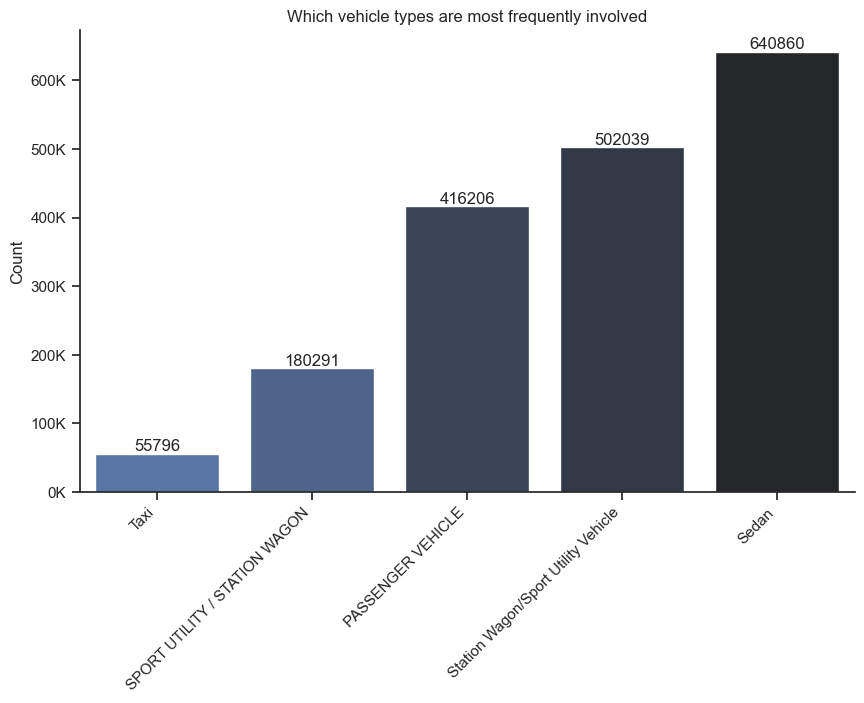

In [5]:
plt.figure(figsize=(10,6))
sns.set_theme(style='ticks')

ax=sns.barplot(data=plot10,x='VEHICLE TYPE CODE 1',y='count',hue='count',palette='dark:b_r')
ax.invert_xaxis()
ax.legend_.remove()
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Which vehicle types are most frequently involved')
plt.xlabel('')
plt.ylabel('Count')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K' ))

for i in ax.containers:
    ax.bar_label(i)

sns.despine()
plt.show()

- Are certain vehicle types more associated with fatal crashes?

In [6]:
total_crashes = df.groupby('VEHICLE TYPE CODE 1').size().reset_index(name='total_crashes')

fatal_crashes = df[df['NUMBER OF PERSONS KILLED'] > 0]
fatal_by_vehicle = fatal_crashes.groupby('VEHICLE TYPE CODE 1').size().reset_index(name='fatal_crashes')

vehicle_fatality_rate = pd.merge(total_crashes, fatal_by_vehicle, on='VEHICLE TYPE CODE 1', how='left')
vehicle_fatality_rate['fatal_crashes'] = vehicle_fatality_rate['fatal_crashes'].fillna(0)

vehicle_fatality_rate['fatality_rate_%'] = (
    (vehicle_fatality_rate['fatal_crashes'] / vehicle_fatality_rate['total_crashes']) * 100).round(2)

vehicle_fatality_rate = vehicle_fatality_rate.sort_values(by='fatal_crashes', ascending=False)
vehicle_fatality_rate.head(5)


,VEHICLE TYPE CODE 1,total_crashes,fatal_crashes,fatality_rate_%
1184,Station Wagon/Sport Utility Vehicle,502039,709.0,0.14
1155,Sedan,640860,707.0,0.11
918,PASSENGER VEHICLE,416206,376.0,0.09
835,Motorcycle,9831,258.0,2.62
1111,SPORT UTILITY / STATION WAGON,180291,208.0,0.12


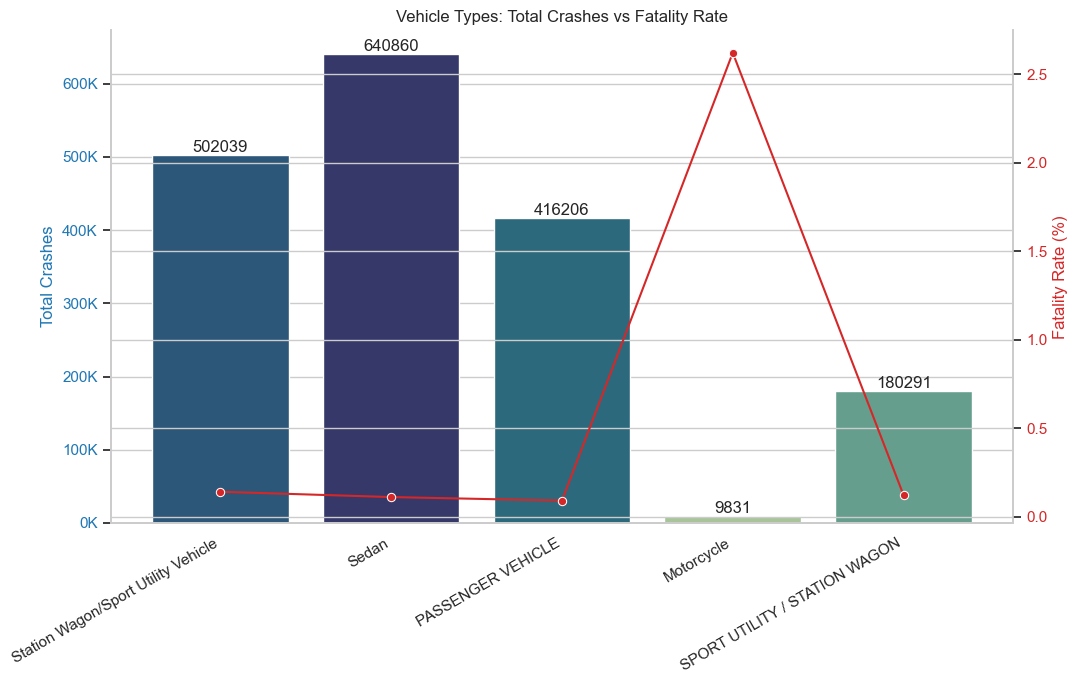

In [12]:
data = vehicle_fatality_rate.sort_values(by='fatal_crashes', ascending=False).head()

sns.set_theme(style='whitegrid')
fig, ax1 = plt.subplots(figsize=(11,7))

sns.barplot(
    data=data,
    x='VEHICLE TYPE CODE 1',
    y='total_crashes',
    hue='total_crashes',
    palette='crest',
    ax=ax1
)

ax1.set_ylabel('Total Crashes', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
plt.setp(ax1.get_xticklabels(), rotation=30, ha='right')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K' ))
ax1.legend_.remove()
ax1.set_xlabel('')

for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', fontsize=12, label_type='edge')

ax2 = ax1.twinx()
sns.lineplot(
    data=data,
    x='VEHICLE TYPE CODE 1',
    y='fatality_rate_%',
    color='tab:red',
    marker='o',
    ax=ax2
)
ax2.set_ylabel('Fatality Rate (%)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Vehicle Types: Total Crashes vs Fatality Rate')
plt.xlabel('')

sns.despine(right=False)
plt.tight_layout()
plt.show()
